# 3.Modeling<a id='3.Modeling'></a>



## 3.1 Contents<a id='3.1_Contents'></a>

  * [3.2 Introduction](#3.2_Introduction)   
  * [3.3 Load The Data](#3.3_Load_The_Data)  
  * [3.4 Baseline model Using Linear regression](#3.4_Baseline_model_Using_Linear_regression)  
  * [3.5 KNN regression](#3.5_KNN_regression)      
  * [3.6 MAPE from both the models for the test set](#3.6_MAPE_from_both_the_models_for_the_test_set)
  * [3.7 Upper/Lower bound of the errors of residuals](#3.7_Upper/Lower_bound_of_the_errors_of_residualse)  
  * [3.8  Scale the Data ](#3.8_Scale_the_Data)
  * [3.9 Save data](#3.9_Save_data)
  * [3.10 Summary](#3.10_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

In the modeling phase of our notebook, we aim to predict house prices accurately. By leveraging various techniques such as data preprocessing, feature engineering, model selection, training, evaluation, and fine-tuning, we strive to develop effective models. The iterative process helps us experiment with different approaches and optimize the model's performance to make accurate price predictions for houses.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import numpy as np
%matplotlib inline
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve,cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.neighbors import KNeighborsRegressor


from library.sb_utils import save_file

## 3.3 Load The Data<a id='3.3_Load_The_Data'></a>

[<a href="#3.Modeling">Back to top</a>]

In [2]:
house_data = pd.read_csv('./cleaned_data/house_data_cleaned_2.csv') 

In [3]:
house_data.shape

(1460, 74)

In [4]:
house_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,20
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,47
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,22
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,108
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,23


In [5]:
house_data.isnull().sum().sort_values(ascending=False) # check for any missing values

MSSubClass      0
GarageFinish    0
FireplaceQu     0
Fireplaces      0
Functional      0
               ..
ExterCond       0
ExterQual       0
MasVnrArea      0
MasVnrType      0
House_age       0
Length: 74, dtype: int64

In [6]:
house_data.select_dtypes(include='object').nunique() # check no. of unique values for categorical data

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [7]:
# Separate Independent and dependent variables

X = house_data.drop("SalePrice", axis=1)

y = house_data[["SalePrice"]]

In [8]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,House_age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,20
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,47
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,22
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,108
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,24
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,45
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,82
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,73


[<a href="#3.Modeling">Back to top</a>]

In [9]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### Create dummy variables to deal with categorical inputs

In [10]:
X = pd.get_dummies(X, dtype='int64') # changed all the categorical values to dummy variables

In [11]:
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2002,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1970,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,2000,0.0,0,0,953,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1988,119.0,790,163,589,1542,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,2006,0.0,275,0,877,1152,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1996,0.0,49,1029,0,1078,...,0,0,0,1,0,0,0,0,1,0


In [12]:
X.dtypes

MSSubClass               int64
LotArea                  int64
OverallQual              int64
OverallCond              int64
YearRemodAdd             int64
                         ...  
SaleCondition_AdjLand    int64
SaleCondition_Alloca     int64
SaleCondition_Family     int64
SaleCondition_Normal     int64
SaleCondition_Partial    int64
Length: 285, dtype: object

### Train/Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [14]:
X_train.shape, X_test.shape

((1022, 285), (438, 285))

In [15]:
y_train.shape, y_test.shape

((1022, 1), (438, 1))

## 3.4 Baseline model Using Linear regression<a id='3.4_Baseline_model_Using_Linear_regression'></a>

In [16]:
lr = LinearRegression().fit(X_train, y_train)

In [17]:
y_tr_pred = lr.predict(X_train)
y_te_pred = lr.predict(X_test)

In [18]:
mae_lr = mean_absolute_error(y_train, y_tr_pred),mean_absolute_error(y_test, y_te_pred)
mae_lr

(12674.45994700751, 533477115.53844345)

In [19]:
mape_lr = mean_absolute_percentage_error(y_test, y_te_pred)
round(mape_lr,2)

3632.05

In [20]:
y_test = y_test.reset_index(drop=True) # reset index
y_test

,SalePrice
0,240000
1,185000
2,168500
3,430000
4,127000
...,...
433,138500
434,118400
435,149000
436,426000


In [21]:
# convert to dadaframe
y_te_pred=pd.DataFrame(y_te_pred)

[<a href="#3.Modeling">Back to top</a>]

In [22]:
y_te_pred

,0
0,238702.127533
1,196363.375916
2,279261.400177
3,394181.908691
4,132319.249634
...,...
433,132185.477661
434,126016.158295
435,133603.719040
436,402138.758575


In [23]:
# merege y_test and y_te_pre to  perform evaluation

test_data = pd.merge(y_test, y_te_pred, left_index=True, right_index=True)
test_data .columns = ['Actual', 'Predicted']


In [24]:
test_data['Predicted'] = test_data['Predicted'].astype(int)

In [25]:
test_data['AbsoluteError'] = np.abs(test_data['Actual'] - test_data['Predicted']) # PE = absolute(Actual - Predicted)

In [26]:
test_data['PercentageError'] = (test_data['AbsoluteError'] / test_data['Actual']) * 100 # PercentageError

In [27]:
Residuals = [predicted - actual for predicted, actual in zip(test_data['Predicted'], test_data['Actual'])]
Residuals=pd.DataFrame(Residuals)

test_data['Residuals'] = Residuals

In [28]:
test_data

,Actual,Predicted,AbsoluteError,PercentageError,Residuals
0,240000,238702,1298,0.540833,-1298
1,185000,196363,11363,6.142162,11363
2,168500,279261,110761,65.733531,110761
3,430000,394181,35819,8.330000,-35819
4,127000,132319,5319,4.188189,5319
...,...,...,...,...,...
433,138500,132185,6315,4.559567,-6315
434,118400,126016,7616,6.432432,7616
435,149000,133603,15397,10.333557,-15397
436,426000,402138,23862,5.601408,-23862


<font color=blue>__Plotting Cross-Validated Predictions__

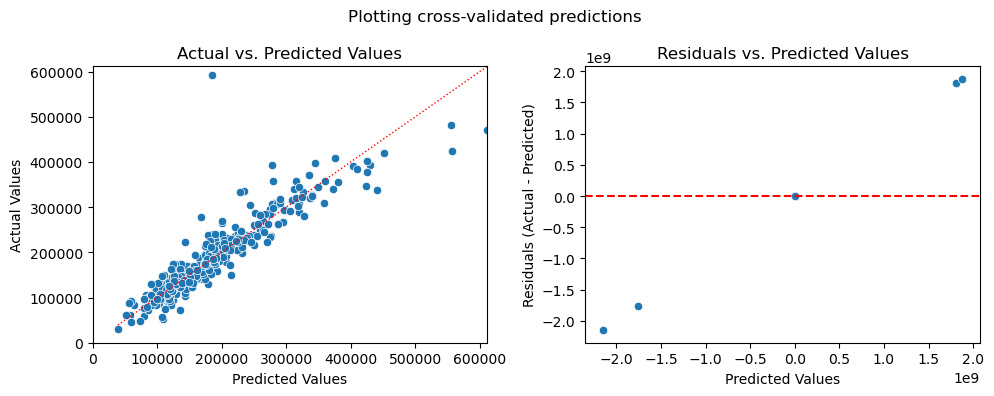

In [29]:


fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Create a figure with 1 row and 2 columns

# Subplot 1: Actual vs. Predicted
sns.scatterplot(data=test_data, x='Actual', y='Predicted', ax=axs[0])
axs[0].plot([test_data['Actual'].min(), test_data['Actual'].max()], [test_data['Actual'].min(), test_data['Actual'].max()], 'r:', linewidth=1)  # Red dotted line from min to max point
axs[0].set_xlim([0, test_data['Actual'].max()])  # Set x-axis limits to start from 0
axs[0].set_ylim([0, test_data['Actual'].max()])  # Set y-axis limits to start from 0
axs[0].set_ylabel('Actual Values')
axs[0].set_xlabel('Predicted Values')
axs[0].set_title('Actual vs. Predicted Values')

# Subplot 2: Predicted with Error
sns.scatterplot(data=test_data, x='Predicted', y='Residuals', ax=axs[1])
axs[1].axhline(y=0, color='r', linestyle='--')  # Residuals line (y=0)
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals (Actual - Predicted)')
axs[1].set_title('Residuals vs. Predicted Values')

fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

[<a href="#3.Modeling">Back to top</a>]

<font color=blue>__Histograms showing distribution of residuals with the test set__


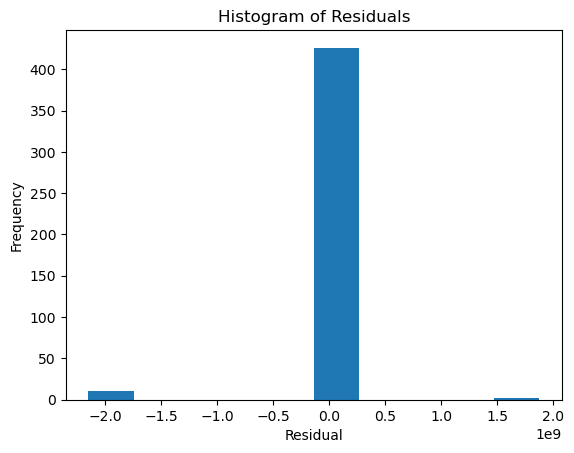

In [30]:
# Calculate residuals
residuals = [predicted - actual for predicted, actual in zip(test_data['Predicted'], test_data['Actual'])]

# Create histogram
plt.hist(residuals)  # Adjust the number of bins as per your preference
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


## 3.5 KNN regression<a id='3.5_KNN_regression'></a>    




In [31]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the SAME training data
knn_regressor.fit(X_train, y_train)



KNeighborsRegressor()

In [32]:
# Make predictions on the train and test data
y_tr_pred_knn = knn_regressor.predict(X_train)
y_te_pred_knn = knn_regressor.predict(X_test)

In [33]:
mae_knn = mean_absolute_error(y_train, y_tr_pred_knn ),mean_absolute_error(y_test,y_te_pred_knn)
mae_knn

(23920.061448140896, 31235.99589041096)

In [34]:
# Calculate MAPE
mape_knn = mean_absolute_percentage_error(y_test, y_te_pred_knn)
mape_knn

0.17969779621675094

In [35]:
y_te_pred_knn=pd.DataFrame(y_te_pred_knn)

In [36]:
test_data2 = pd.merge(y_test, y_te_pred_knn, left_index=True, right_index=True)
test_data2 .columns = ['Actual', 'Predicted']

In [37]:
test_data2['AbsoluteError'] = np.abs(test_data2['Actual'] - test_data2['Predicted']) # PE = absolute(Actual - Predicted)

In [38]:
test_data2['PercentageError'] = (test_data2['AbsoluteError'] / test_data2['Actual']) * 100 # PercentageError

In [39]:
test_data2['PercentageError'] = test_data2['PercentageError'].round(2)

In [40]:
Residuals2 = [predicted - actual   for predicted, actual in zip(test_data2['Predicted'], test_data2['Actual'])]
Residuals2=pd.DataFrame(Residuals2)

test_data2['Residuals2'] = Residuals2

In [41]:
test_data2

,Actual,Predicted,AbsoluteError,PercentageError,Residuals2
0,240000,314752.2,74752.2,31.15,74752.2
1,185000,147640.0,37360.0,20.19,-37360.0
2,168500,171480.0,2980.0,1.77,2980.0
3,430000,372908.6,57091.4,13.28,-57091.4
4,127000,155500.0,28500.0,22.44,28500.0
...,...,...,...,...,...
433,138500,136400.0,2100.0,1.52,-2100.0
434,118400,122400.0,4000.0,3.38,4000.0
435,149000,139440.0,9560.0,6.42,-9560.0
436,426000,289713.2,136286.8,31.99,-136286.8


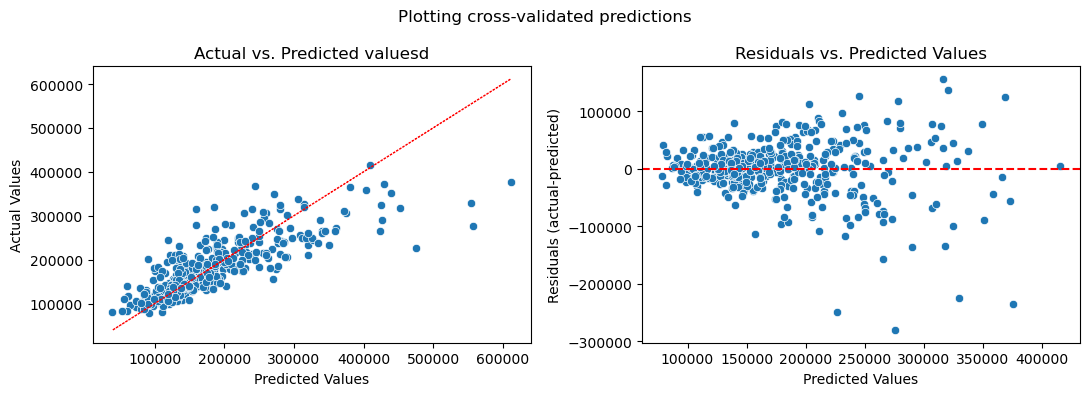

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(11, 4))

sns.scatterplot(data=test_data2,x='Actual', y='Predicted', ax=axs[0])
axs[0].plot(test_data2['Actual'], test_data2['Actual'], 'r:', linewidth=1)  # Dotted line at Actual values
axs[0].set_ylabel('Actual Values')
axs[0].set_xlabel('Predicted Values')
axs[0].set_title('Actual vs. Predicted valuesd')



sns.scatterplot(data=test_data2, x='Predicted', y='Residuals2', ax=axs[1])
axs[1].axhline(y=0, color='r', linestyle='--')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals (actual-predicted)')
axs[1].set_title('Residuals vs. Predicted Values')


fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

[<a href="#3.Modeling">Back to top</a>]

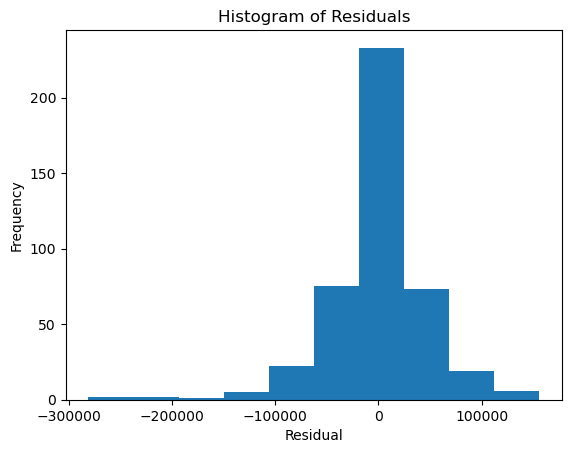

In [43]:
# Calculate residuals
residuals = [predicted - actual for predicted, actual in zip(test_data2['Predicted'], test_data2['Actual'])]

# Create histogram
plt.hist(residuals)  # Adjust the number of bins as per your preference
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

## 3.6 MAPE from both the models for the test set<a id='3.6_MAPE_from_both_the_models_for_the_test_set'></a>

In [44]:
print('The mean absolute percentage error with Linear Regression is:', mape_lr, '\nThe mean absolute error with KNN regression is:', mape_knn)

The mean absolute percentage error with Linear Regression is: 3632.0487825436453 
The mean absolute error with KNN regression is: 0.17969779621675094


[<a href="#3.Modeling">Back to top</a>]

## 3.7 Upper/Lower bound of the errors of residuals<a id='3.7_Upper/Lower_bound_of_the_errors_of_residualse'></a>

<font color=blue>__with Linear Regression:__

In [45]:
#upper/lower bound of the errors with 95% of the residuals 

residuals_lr = test_data['Predicted'] -  test_data['Actual']

residuals_std = np.std(residuals_lr)

n = len(residuals_lr)

se = residuals_std / np.sqrt(n)

critical_value = 1.96 # Approximate value for a two-tailed test

margin_of_error = critical_value * se

upper_bound = np.mean(residuals_lr) + margin_of_error
lower_bound = np.mean(residuals_lr) - margin_of_error
print("Upper Bound: {:.2f}".format(upper_bound))
print("Lower Bound: {:.2f}".format(lower_bound))

Upper Bound: -7848330.29
Lower Bound: -71577288.53


In [46]:
#Now considering the actual values of the residuals from linear regression

mean = test_data['Residuals'].mean()
std = test_data['Residuals'].std()

lower_threshold = mean - 1.96 * std
upper_threshold = mean + 1.96 * std


filtered_values = test_data[(test_data['Residuals'] >= lower_threshold) & (test_data['Residuals']<= upper_threshold)]['Residuals']

largest_positive = filtered_values[filtered_values > 0].max()
largest_negative = filtered_values[filtered_values < 0].min()

print("Largest positive value within 95% range:", largest_positive)
print("Largest negative value within 95% range:", largest_negative)

Largest positive value within 95% range: 408260
Largest negative value within 95% range: -141994


<font color=blue>__with KNN Regression :__

In [47]:
residuals_knn = test_data2['Predicted'] - test_data2['Actual']
residuals_std = np.std(residuals_knn)
n = len(residuals_knn)
se = residuals_std / np.sqrt(n)
critical_value = 1.96  # Approximate value for a two-tailed test
margin_of_error = critical_value * se
upper_bound = np.mean(residuals_knn) + margin_of_error
lower_bound = np.mean(residuals_knn) - margin_of_error

print("Upper Bound: {:.2f}".format(upper_bound))
print("Lower Bound: {:.2f}".format(lower_bound))

Upper Bound: 3755.13
Lower Bound: -5105.56


In [48]:
mean = np.mean(residuals_knn)#we are working with list
std = np.std(residuals_knn)

lower_threshold = mean - 1.96 * std
upper_threshold = mean + 1.96 * std

In [49]:
filtered_values = [x for x in residuals_knn if lower_threshold <= x <= upper_threshold]

positive_values = [x for x in filtered_values if x > 0]
negative_values = [x for x in filtered_values if x < 0]

largest_positive = max(positive_values, default=None)
largest_negative = min(negative_values, default=None)

print("Largest positive value within 95% range:", largest_positive)
print("Largest negative value within 95% range:", largest_negative)

Largest positive value within 95% range: 88180.0
Largest negative value within 95% range: -93300.0


<font color=blue>__Histograms of residuals for both models__ 

[<a href="#3.Modeling">Back to top</a>]

In [50]:
residuals_lr = [predicted - actual for predicted, actual in zip(test_data['Predicted'], test_data['Actual'])]
residuals_knn = [predicted - actual for predicted, actual in zip(test_data2['Predicted'], test_data2['Actual'])]

df = pd.DataFrame({'Residual': residuals_lr + residuals_knn, 'Model': ['Linear regression'] * len(residuals_lr) + ['Knn regression'] * len(residuals_knn)})
df

,Residual,Model
0,-1298.0,Linear regression
1,11363.0,Linear regression
2,110761.0,Linear regression
3,-35819.0,Linear regression
4,5319.0,Linear regression
...,...,...
871,-2100.0,Knn regression
872,4000.0,Knn regression
873,-9560.0,Knn regression
874,-136286.8,Knn regression


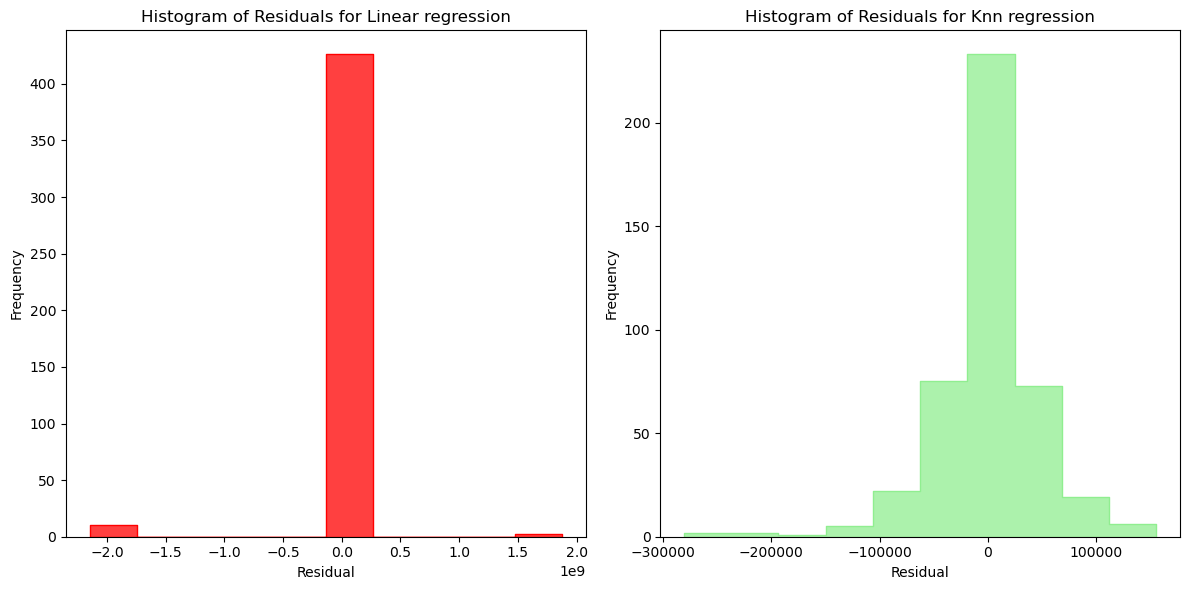

In [51]:

plt.figure(figsize=(12, 6))  # Adjust the figure width (12) and height (6) as needed

# Filter the data for each model
model_1_data = df[df['Model'] == 'Linear regression']
model_2_data = df[df['Model'] == 'Knn regression']

# Plot histogram for Model 1
plt.subplot(1, 2, 1)
sns.histplot(data=model_1_data, x='Residual', element="step", bins=10, color='red')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Linear regression')

# Plot histogram for Model 2
plt.subplot(1, 2, 2)
sns.histplot(data=model_2_data, x='Residual', element="step", bins=10, color='lightgreen')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Knn regression')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

[<a href="#3.Modeling">Back to top</a>]

## 3.8 Scale the Data<a id='3.8_Scale_the_Data'></a>

<font color=blue>__Using Linear regression:__

In [52]:
X_train.shape, X_test.shape

((1022, 285), (438, 285))

In [53]:
y_train.shape, y_test.shape

((1022, 1), (438, 1))

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [55]:
lm = LinearRegression().fit(X_tr_scaled, y_train)
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled )

In [56]:
mae = mean_absolute_error(y_train, y_tr_pred),mean_absolute_error(y_test, y_te_pred)
mae

(12674.34263499359, 3558956587977189.5)

In [57]:
mape_lr = mean_absolute_percentage_error(y_test, y_te_pred)
round(mape_lr,2)

33295726541.33

<font color=blue>__Using KNN:__

In [58]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the SAME training data
knn_regressor.fit(X_tr_scaled, y_train)


y_tr_pred_knn = knn_regressor.predict(X_tr_scaled)
y_te_pred_knn = knn_regressor.predict(X_te_scaled)


In [59]:
# Calculate MAE
mae = round(mean_absolute_error(y_train, y_tr_pred_knn ),2),round(mean_absolute_error(y_test,y_te_pred_knn),2)
mae

(20360.16, 27822.49)

In [60]:

mape_knn = round(mean_absolute_percentage_error(y_test, y_te_pred_knn),2)
mape_knn

0.16

<font color=blue>__MAPE with SCALED data from both the models for the test set__

In [61]:
print('The mean absolute percentage error with Linear Regression is:', mape_lr, '\nThe mean absolute error with KNN regression is:', mape_knn)

The mean absolute percentage error with Linear Regression is: 33295726541.326717 
The mean absolute error with KNN regression is: 0.16


## 3.9 Save data<a id='3.9_Save_data'></a>

In [62]:
X_tr_scaled.shape,X_te_scaled.shape

((1022, 285), (438, 285))

In [63]:
y_train.shape, y_test.shape

((1022, 1), (438, 1))

In [64]:
import pickle
X_tr_scaled = pd.DataFrame(X_tr_scaled)
X_tr_scaled.to_pickle("./cleaned_data/X_tr_scaled.pkl")   #X_tr_scaled = pd.read_pickle("X_tr_scaled.pkl")

In [65]:
X_te_scaled=pd.DataFrame(X_te_scaled)
X_te_scaled.to_pickle("./cleaned_data/X_te_scaled.pkl")

In [66]:
y_train.to_pickle("./cleaned_data/y_train.pkl")

In [67]:
y_test.to_pickle("./cleaned_data/y_test.pkl")

## 3.10 Summary<a id='3.10_Summary'></a>

Having loaded the data, I separated the target feature from the dataset and created dummy variables to handle categorical features.
Initially, I used __Linear Regression__ as the baseline model,resulting in a Mean Absolute Percentage Error: 
(MAPE)=3632.40

which is exceptionally high.
Additionally, the scatter plot comparing the actual and predicted values revealed substantial discrepancies, indicating the presence of non-linearity within the data. The histograms showing the distribution of residuals in the test set further confirmed the wide spread of differences.

To compare the outcomes, I decided to employ the K-nearest neighbors __(KNN) algorithm__.

The MAPE=0.179 


However, although there is improvement compared to the initial model, the K-nearest neighbors (KNN) algorithm still fell short of the desired level of accuracy. This can be observed by examining the scatter plot, which illustrates how the predicted values differ from the actual values Additionally, the spread of residuals illustrated in the histograms indicates that the model's predictions are not very accurate.

Considering that neither model accurately predicted the target variable, it becomes crucial to explore alternative algorithms to enhance the overall performance. In addition to RandomForestRegressor, other suitable models that could be considered include:

1.Gradient Boosting Regressor
2.Decision Tree Regressor
3.XGBoost Regressor
4.Random Forest Regressor with hyperparameter tuning
5.AdaBoost Regressor


[<a href="#3.Modeling">Back to top</a>]